# Pymaceuticals Inc.
---

### Analysis

- Pymaceuticals, Inc. recently began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. In this most recent study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. The objective of this analysis was to take the data from this study and generate all of the tables and figures needed for the technical report of the clinical study.

- I worked with two initial data sets, both based on specific Mouse ID's. The first contained information about the mice including weight in grams, age in months, gender, and most importantly, the drug regimen they were on. The second contained the study results, including tumor volume, metastatic sites, and the timepoint in days that those results were taken.

- The visualizations I created from the data included bar charts, pie charts, a box plot, line plots, and a scatter plot. The bar chart comparing total mouse timepoints to the drug regimen used told me that both Capomulin and Ramicane were used more than others. The pie chart comparing number of male versus female mice showed me that the data taken in regards to gender was almost perfectly equal. The box plot showing final tumor volume across the treatment regimens of Capomulin, Ramicane, Infubinol, and Ceftamin showed me that the worst out of the four in terms of final tumor volume was Infubinol, which also had a significant outlier in its respective data. Capomulin and Ramicane had very similar and promising results in comparison to the other treatment regimens. The first line plot I created showing a specific mouse's tumor volume in comparison to its number of days on the Capomulin drug treatment showed that it took 20 days for the treatment to start working, but once it did, the tumor volume decreased to well below the starting volume of the mouse's tumor within the following 20 days after the treatment plan began to work. The scatter plot and scatter/line plot regression model both showed me that there is a correlation between the size of the tumor and the weight of the mouse.

- In conclusion, I believe that Pymeceuticals, Inc. was not off on their main drug treatment of interest (Capomulin) in its ability to treat SCC (at least in mice). Although the drug treatment Ramicane also performed well, I would most likely suggest that more research be done just comparing those two specific drug treatments if Pymaceuticals, Inc. really wanted to make a firm decision on which was better. I would also suggest comparing how the weight and age of each mouse may affect how the drug treatment works.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combo_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')

#number of unique mice IDs
unique_mice_count = combo_df['Mouse ID'].nunique()

#check for mouse IDs w duplicae time points
duplicate_mouse_ids = combo_df[combo_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

#data w mouse ID w dup time points
duplicate_mouse_data = combo_df[combo_df['Mouse ID'].isin(duplicate_mouse_ids)]

# df w removed dup mouse id data
cleaned_df = combo_df[~combo_df['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data table for preview
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [31]:
# Checking the number of mice in clean data frame
cleaned_unique_mice_count = cleaned_df['Mouse ID'].nunique()

cleaned_unique_mice_count

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary stats methods to calculate the following properties of each drug regimen
tumor_vol_df=cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_summary_stats=tumor_vol_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

tumor_summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble into a single summary DataFrame

tumor_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

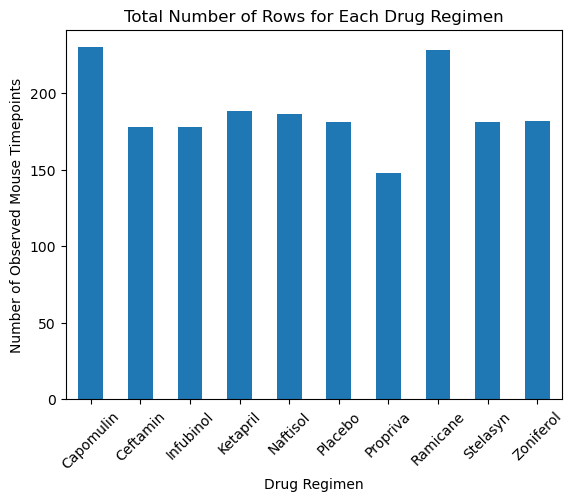

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot
drug_regimen_counts.plot(kind='bar')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

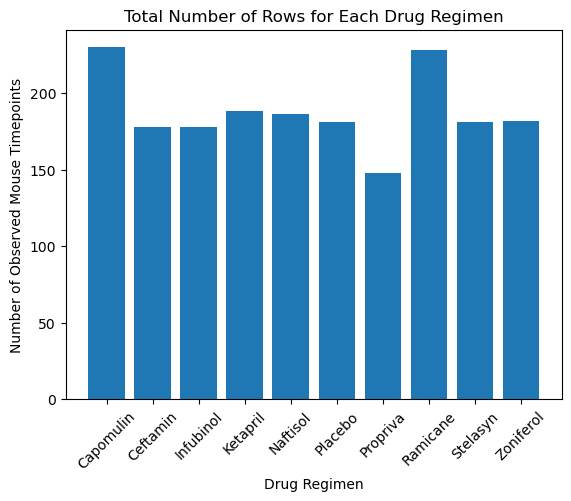

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()

plt.bar(drug_regimen_counts.index, drug_regimen_counts)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

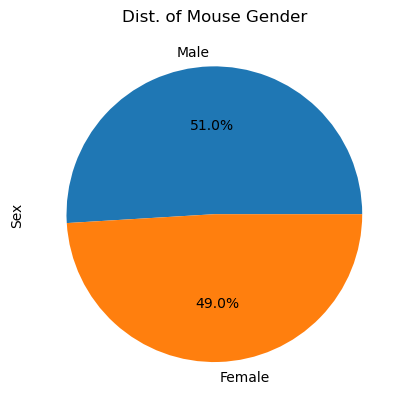

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Calculate the counts of female and male mice
gender_counts = cleaned_df['Sex'].value_counts()

# Plot the pie chart
gender_counts.plot.pie(autopct='%1.1f%%')

plt.title('Dist. of Mouse Gender')
plt.ylabel('Sex')
plt.show()

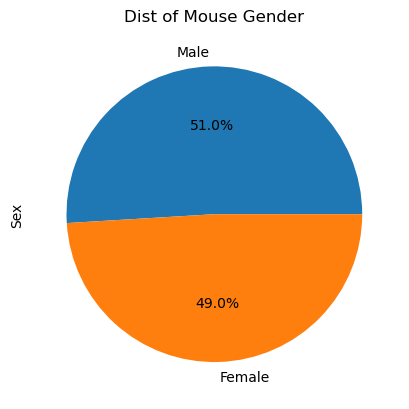

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = cleaned_df['Sex'].value_counts()

# Plot the pie chart
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%')

plt.title('Dist of Mouse Gender')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a grouped DataFrame that shows the last timepoint for each mouse
grouped_df = cleaned_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max().reset_index()

# Merge the grouped DataFrame with the original cleaned DataFrame
merged_df = pd.merge(cleaned_df, grouped_df, on=['Mouse ID', 'Timepoint'], how='inner')

merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y
0,b128,45,38.982878,2,Capomulin,Female,9,22,Capomulin
1,f932,0,45.000000,0,Ketapril,Male,15,29,Ketapril
2,g107,35,71.905117,0,Ketapril,Female,2,29,Ketapril
3,a457,10,49.783419,0,Ketapril,Female,11,30,Ketapril
4,c819,40,62.175705,1,Ketapril,Male,21,25,Ketapril
...,...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17,Capomulin
244,i557,45,47.685963,1,Capomulin,Female,1,24,Capomulin
245,m957,45,33.329098,1,Capomulin,Female,3,19,Capomulin
246,f966,20,30.485985,0,Capomulin,Male,16,17,Capomulin


In [38]:
# Create lists to hold the treatment names and tumor volume data
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Loop through each drug in the treatment list and append the final tumor volumes to the list
for drug in treatment_names:
    tumor_volumes.append(merged_df.loc[merged_df['Drug Regimen_x'] == drug]['Tumor Volume (mm3)'])

# Calculate quartiles and IQR for each treatment and quantitatively determine if there are any potential outliers.
for idx, volumes in enumerate(tumor_volumes):
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"Potential outliers for {treatment_names[idx]}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


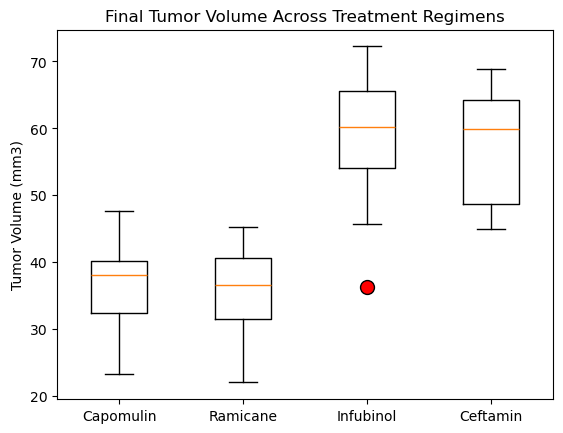

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=treatment_names, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.title('Final Tumor Volume Across Treatment Regimens')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

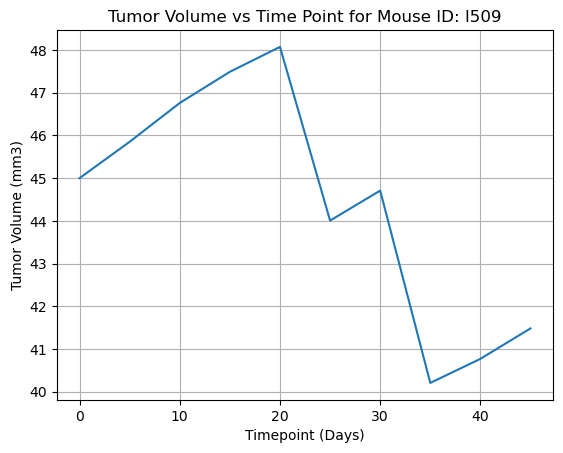

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Choose the individual mouse and the appropriate data for the line plot
single_mouse_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 'l509')]

# Calculate the number of days starting from zero
days = single_mouse_data['Timepoint']

# Create a line plot of tumor volume versus time point for the single mouse
plt.plot(days, single_mouse_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs Time Point for Mouse ID: l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

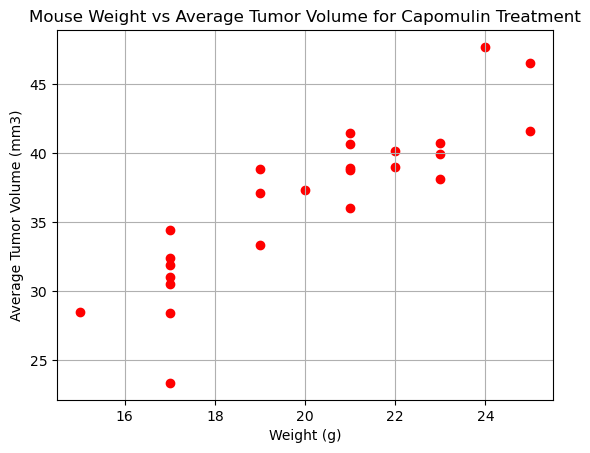

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = merged_df[merged_df['Drug Regimen_x'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with mouse weight for the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen_x'] == 'Capomulin']
merged_data = pd.merge(capomulin_data, avg_tumor_volume, on='Mouse ID', suffixes=('_original', '_avg'))

# Create a scatter plot of mouse weight versus average observed tumor volume for Capomulin treatment regimen
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_avg'], color='r', marker='o')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8767060403658118


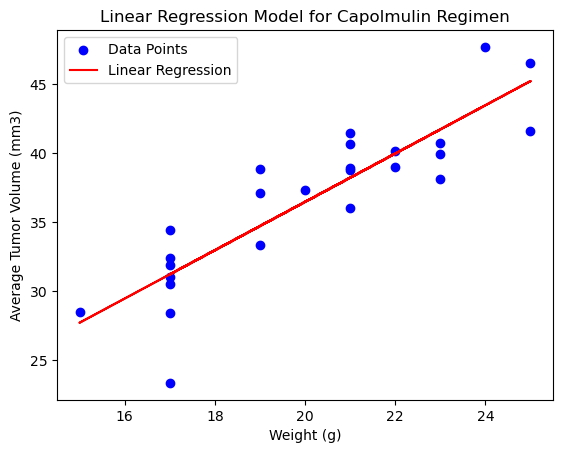

In [43]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin treatment regimen
capomulin_data = merged_data[merged_data['Drug Regimen_x'] == 'Capomulin']

# Calculate the correlation coefficient
correlation = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)_avg'])
print(f"Correlation Coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_avg'])

# Create scatter plot
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_avg'], color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(capomulin_data['Weight (g)'], slope * capomulin_data['Weight (g)'] + intercept, color='red', label='Linear Regression')

plt.title('Linear Regression Model for Capolmulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()